# **Step 1: Reading the Data file and checking for row and columns**
its the important step in data analyst if you can not read the file you can not get the data

In [38]:
import pandas as pd
footballerData = pd.read_csv('/content/drive/MyDrive/ST1/project 1/dataset_football_cleaned.csv', encoding='latin')
print('Shape before deleting duplicate values:', footballerData.shape)

footballerData=footballerData.drop_duplicates()
print('Shape After deleting duplicate values:', footballerData.shape)

Shape before deleting duplicate values: (12711, 44)
Shape After deleting duplicate values: (11920, 44)


**key observation from step 1:**

* name: The name of the footballer.
* first_name: The first name of the footballer.
* age: The age of the footballer.
* nation: The nationality of the footballer.
* league: The league in which the footballer plays.
* team: The team that the footballer represents.
* goals_selection: The number of goals selected.
* selections_nation: The number of national team selections.
* position: The playing position of the footballer.
* price: The market value of the footballer.
* Additionally, we have performance-related metrics, including:
* assist_continent: Number of assists in continental competitions.
* own_goal_continent: Number of own goals in continental competitions.
* sub_on_continent: Number of times substituted on in continental competitions.
* sub_out_continent: Number of times substituted off in continental competitions.
* yellow_card_continent: Number of yellow cards in continental competitions.
* second_yellow_card_continent: Number of second yellow cards in continental competitions.
* red_card_continent: Number of red cards in continental competitions.
* penalty_goal_continent: Number of penalty goals in continental competitions.
* conceded_goal_continent: Number of goals conceded in continental competitions.
* clean_sheet_continent: Number of clean sheets in continental competitions.

#**Step2: Problem Statement Definition**
* Creating a prediction model to wpredict the price('PRICE' ) of footballers
* Target Variable: 'PRICE'
* PricePredictors/Features: AGE, POSITION, TEAM, LEAGUE, TEAM, ETC.

#**Step 3: checking the first 10 and the last 10 rows of data and their attribute**


In [4]:
footballerData.head(10)

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LÃ©oNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,MarlonSilva,NaN,28,Brazil,FirstDivision,AlkiOroklini,0,0,Forward,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,Konstantinou,Stavrinos,21,Cyprus,FirstDivision,AlkiOroklini,0,7,Forward,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,Belameiri,ElHadi,27,Algeria,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,400000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,Acosta,Rafael,29,Venezuela,FirstDivision,AlkiOroklini,0,12,CentralMidfield,200000.0,...,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0,0
9,Spoljaric,Matija,21,Cyprus,FirstDivision,AlkiOroklini,0,7,CentralMidfield,500000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
footballerData.tail(10)

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
12701,Hasegawa,AriaJasuru,30,Japan,J1League,NagoyaGrampus,0,0,CentralMidfield,400000.0,...,0.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0,0,0
12702,Yonemoto,Takuji,28,Japan,J1League,NagoyaGrampus,0,1,DefensiveMidfield,500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12703,Kobayashi,Yuki,30,Japan,J1League,NagoyaGrampus,0,0,DefensiveMidfield,900000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12704,Naruse,Shumpei,18,Japan,J1League,NagoyaGrampus,0,0,Midfielder,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12705,Ito,Hiroki,19,Japan,J1League,NagoyaGrampus,0,2,DefensiveMidfield,75000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12706,Neto,Eduardo,30,Brazil,J1League,NagoyaGrampus,0,0,DefensiveMidfield,1350000.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
12707,Soma,Yuki,21,Japan,J1League,NagoyaGrampus,0,0,Midfielder,75000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12708,Fujii,Haruya,18,Japan,J1League,NagoyaGrampus,0,0,Defender,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12709,Takeda,Yohei,31,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12710,Shibuya,Tsubasa,24,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


#**Step 3: Testing if the target variable is balanced or skewed.**

it seem like the targetVariable is too skewed for the model to able to predict accurately. so i used a data transformation which is log transformation in order to normalize the data

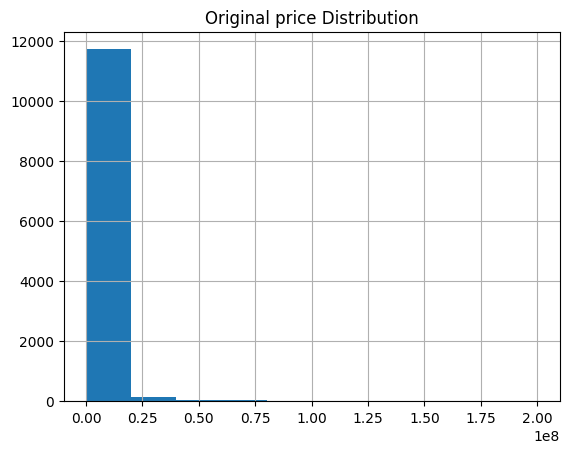

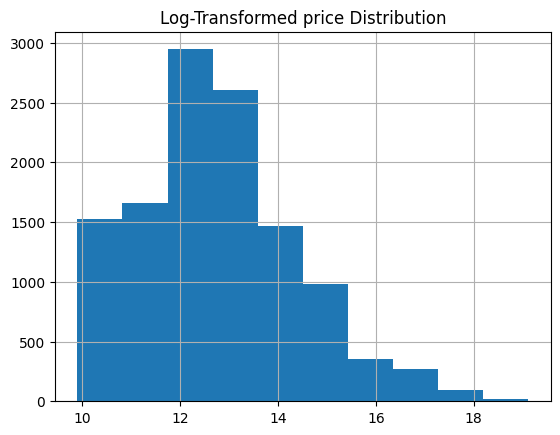

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Original skewed histogram
footballerData['price'].hist()
plt.title('Original price Distribution')
plt.show()

# Applying log transformation
footballerData['price_log'] = np.log(footballerData['price'])

# Plotting transformed data
footballerData['price_log'].hist()
plt.title('Log-Transformed price Distribution')
plt.show()

#**Step 4:summary of the data attribute in the Database file**


In [7]:
footballerData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11920 entries, 0 to 12710
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11920 non-null  object 
 1   first_name                    10911 non-null  object 
 2   age                           11920 non-null  int64  
 3   nation                        11920 non-null  object 
 4   league                        11920 non-null  object 
 5   team                          11920 non-null  object 
 6   goals_selection               11920 non-null  int64  
 7   selections_nation             11920 non-null  int64  
 8   position                      11920 non-null  object 
 9   price                         11920 non-null  float64
 10  end_contract                  7958 non-null   float64
 11  goal_champ                    11920 non-null  float64
 12  assist_champ                  11920 non-null  float64
 13  own_go

In [8]:
footballerData.describe(include='all')

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent,price_log
count,11920,10911,11920.000000,11920,11920,11920,11920.000000,11920.000000,11920,1.192000e+04,...,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.000000,11920.0,11920.0,11920.000000
unique,9202,4610,NaN,167,74,1057,NaN,NaN,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RodrÃ­guez,Daniel,NaN,Brazil,PremierLeague,Nacional,NaN,NaN,Goalkeeper,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,47,76,NaN,847,686,32,NaN,NaN,2319,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.082634,NaN,NaN,NaN,0.624413,5.954782,NaN,1.876331e+06,...,0.009144,1.146896,1.266359,0.658389,1.004446,0.255369,0.040772,0.0,0.0,12.802197
std,NaN,NaN,4.579669,NaN,NaN,NaN,2.687104,15.153029,NaN,7.465548e+06,...,0.102818,2.854849,3.582210,2.042401,6.324136,1.861526,0.346883,0.0,0.0,1.574255
min,NaN,NaN,16.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,2.000000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9.903488
25%,NaN,NaN,23.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,1.250000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.736069
50%,NaN,NaN,26.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,3.000000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,12.611538
75%,NaN,NaN,29.000000,NaN,NaN,NaN,0.000000,4.000000,NaN,8.000000e+05,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,13.592367


#**Step 5: remove any row which contain a null value**





In [9]:
footballerData.dropna()

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent,price_log
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0,15.201805
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.384728
6,Konstantinou,Stavrinos,21,Cyprus,FirstDivision,AlkiOroklini,0,7,Forward,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,11.512925
7,Belameiri,ElHadi,27,Algeria,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,400000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,12.899220
8,Acosta,Rafael,29,Venezuela,FirstDivision,AlkiOroklini,0,12,CentralMidfield,200000.0,...,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0,0,12.206073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12705,Ito,Hiroki,19,Japan,J1League,NagoyaGrampus,0,2,DefensiveMidfield,75000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,11.225243
12706,Neto,Eduardo,30,Brazil,J1League,NagoyaGrampus,0,0,DefensiveMidfield,1350000.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,14.115615
12708,Fujii,Haruya,18,Japan,J1League,NagoyaGrampus,0,0,Defender,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,10.819778
12709,Takeda,Yohei,31,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,11.736069


#**Step 6: Testing the null percentage to see if it is better to remove it than to leave it in the data**
as the tested data shown that first_name has 8% of null value out of 100% and name is not necessary to keep anyway so removing wont have any effect and end of contact is 33% which is quite high so removing it will only greatly help the prediction

In [10]:
total=len(footballerData['end_contract'])
missingValue=footballerData.isnull().sum()
print((missingValue/total)*100)


footballerData.dropna().isnull().sum()

name                             0.000000
first_name                       8.464765
age                              0.000000
nation                           0.000000
league                           0.000000
team                             0.000000
goals_selection                  0.000000
selections_nation                0.000000
position                         0.000000
price                            0.000000
end_contract                    33.238255
goal_champ                       0.000000
assist_champ                     0.000000
own_goal_champ                   0.000000
sub_on_champ                     0.000000
sub_out_champ                    0.000000
yellow_card_champ                0.000000
second_yellow_card_champ         0.000000
red_card_champ                   0.000000
penalty_goal_champ               0.000000
conceded_goal_champ              0.000000
clean_sheet_champ                0.000000
goal_cup                         0.000000
assist_cup                       0

,0
name,0
first_name,0
age,0
nation,0
league,0
team,0
goals_selection,0
selections_nation,0
position,0
price,0


#**Step7: drop unnessary column that does not effect the outcome of the prediction**
the columns that will be drop is name, first_name, and end_contract.the reason that it is dropped because name is not necessary for predicted due to the fact everyname is all difference and end_contract have too many null value.

In [11]:
footballerData=footballerData.drop('name',axis=1)
footballerData=footballerData.drop('first_name',axis=1)
footballerData=footballerData.drop('end_contract',axis=1)
footballerData.head(10)

,age,nation,league,team,goals_selection,selections_nation,position,price,goal_champ,assist_champ,...,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent,price_log
0,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0,15.201805
1,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,6.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,13.592367
2,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,13.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.384728
3,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,10.819778
4,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,12.206073
5,28,Brazil,FirstDivision,AlkiOroklini,0,0,Forward,150000.0,17.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,11.918391
6,21,Cyprus,FirstDivision,AlkiOroklini,0,7,Forward,100000.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,11.512925
7,27,Algeria,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,400000.0,23.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,12.899220
8,29,Venezuela,FirstDivision,AlkiOroklini,0,12,CentralMidfield,200000.0,4.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0,0,12.206073
9,21,Cyprus,FirstDivision,AlkiOroklini,0,7,CentralMidfield,500000.0,6.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,13.122363


#**Step8: observe the Data to see which is continuos and which is categorical**

In [12]:
footballerData.nunique()

,0
age,29
nation,167
league,74
team,1057
goals_selection,41
selections_nation,135
position,12
price,132
goal_champ,141
assist_champ,122


#**from the observation above the continuous and categorical is**
* age	Continuious
* nation	Continuious
* league	Continuious
* team	Continuious
* goals_selection Continuious
* selections_nation	Continuious
* position	categorical
* price	Continuious
* goal_champ	Continuious
* assist_champ	Continuious
* own_goal_champ categorical
* sub_on_champ	Continuious
* sub_out_champ	Continuious
* yellow_card_champ	Continuious
* second_yellow_card_champ	categorical
* red_card_champ	categorical
* penalty_goal_champ	Continuious
* conceded_goal_champ	Continuious
* clean_sheet_champ	categorical
* goal_cup	Continuious
* assist_cup	Continuious
* own_goal_cup	categorical
* sub_on_cup	Continuious
* sub_out_cup	Continuious
* yellow_card_cup	Continuious
* second_yellow_card_cup	categorical
* red_card_cup	Continuious
* penalty_goal_cup	Continuious
* conceded_goal_cup	categorical
* clean_sheet_cup	categorical
* goal_continent	Continuious
* assist_continent	Continuious
* own_goal_continent	categorical
* sub_on_continent	Continuious
* sub_out_continent Continuious
* yellow_card_continent	Continuious
* second_yellow_card_continent	Continuious
* red_card_continent	Continuious
* penalty_goal_continent	categorical
* conceded_goal_continent	categorical
* clean_sheet_continent	categorical
* price_log	Continuious




## **Step 8: Visual Exploratory Data Analysis**

In [13]:
def PlotBarCharts(inpData, colsToPlot):
  import matplotlib.pyplot as plt
  %matplotlib inline
  # Generating multiple subplots
  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

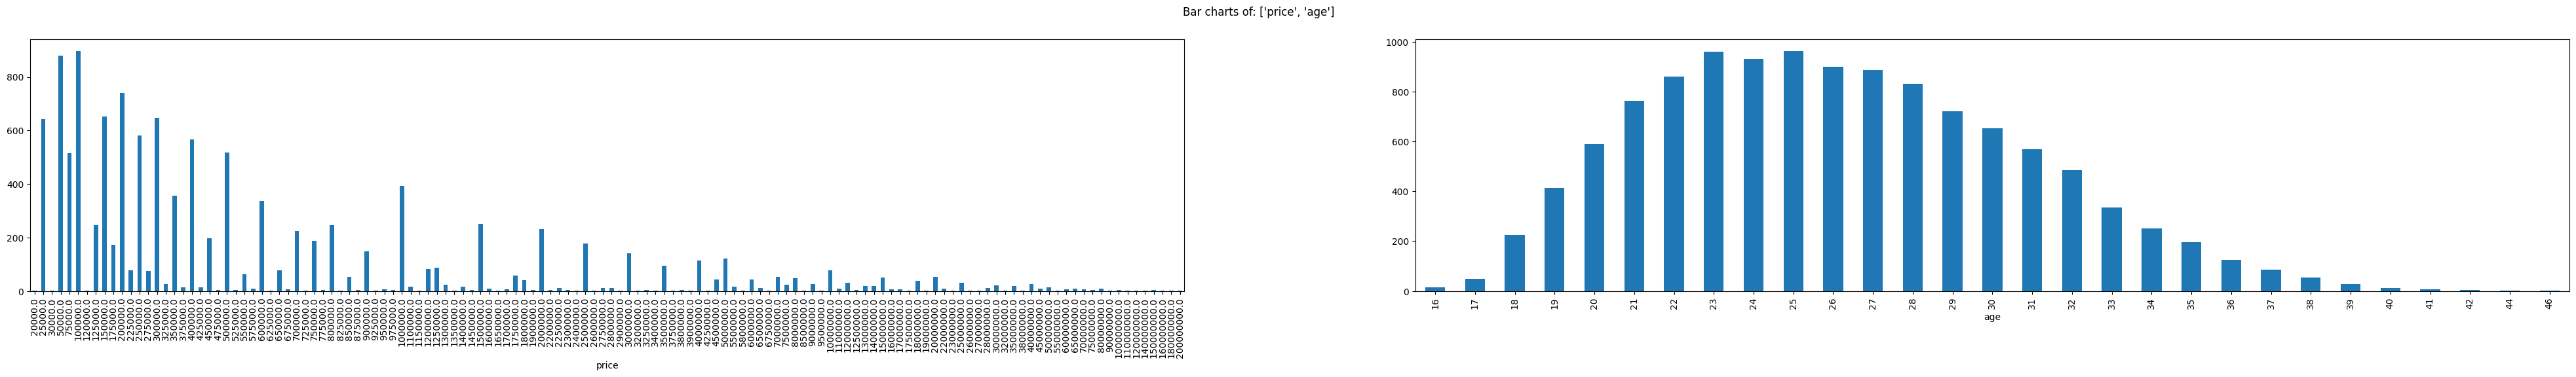

In [14]:
PlotBarCharts(inpData=footballerData, colsToPlot=['price','age'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'goal_champ'}>,
        <Axes: title={'center': 'assist_champ'}>],
       [<Axes: title={'center': 'assist_continent'}>,
        <Axes: title={'center': 'own_goal_continent'}>,
        <Axes: title={'center': 'sub_on_continent'}>,
        <Axes: title={'center': 'sub_out_continent'}>],
       [<Axes: title={'center': 'yellow_card_continent'}>,
        <Axes: title={'center': 'second_yellow_card_continent'}>,
        <Axes: title={'center': 'red_card_continent'}>,
        <Axes: title={'center': 'penalty_goal_continent'}>],
       [<Axes: title={'center': 'penalty_goal_continent'}>,
        <Axes: title={'center': 'clean_sheet_continent'}>, <Axes: >,
        <Axes: >]], dtype=object)

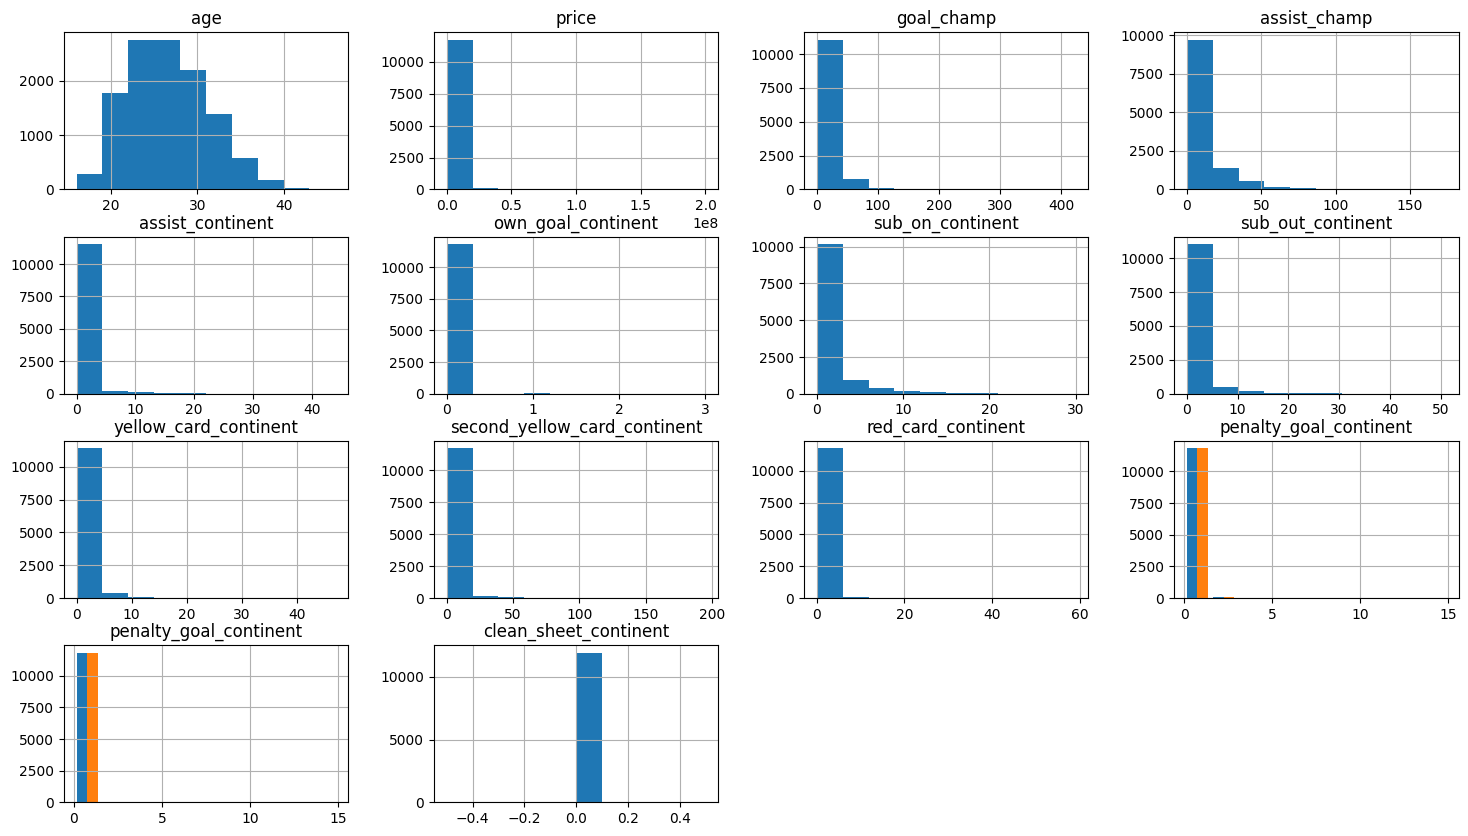

In [15]:
footballerData.hist(['age',
                     'price',
                     'goal_champ',
                     'assist_champ',
                     'assist_continent',
                     'own_goal_continent',
                     'sub_on_continent',
                     'sub_out_continent',
                     'yellow_card_continent',
                     'second_yellow_card_continent',
                     'red_card_continent',
                     'penalty_goal_continent',
                     'penalty_goal_continent',
                     'clean_sheet_continent'], figsize=(18,10))

#**Step 9: outliner Treatment**

In [16]:
footballerData['assist_champ'][footballerData['assist_champ']<60].sort_values(ascending=False)
footballerData['assist_continent'][footballerData['assist_continent']<60].sort_values(ascending=False)

,assist_continent
4747,44.0
273,39.0
11642,34.0
12654,29.0
12232,29.0
...,...
4508,0.0
4513,0.0
4516,0.0
4520,0.0


In [17]:
# footballerData['assist_champ'][footballerData['assist_champ']>60] =59.00
footballerData['assist_continent'][footballerData['assist_continent']>60] =44.0

<ipython-input-17-b109034a7dc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  footballerData['assist_continent'][footballerData['assist_continent']>60] =44.0


#**Step10 : visuallize Data after outliner treatment**

array([[<Axes: title={'center': 'assist_continent'}>]], dtype=object)

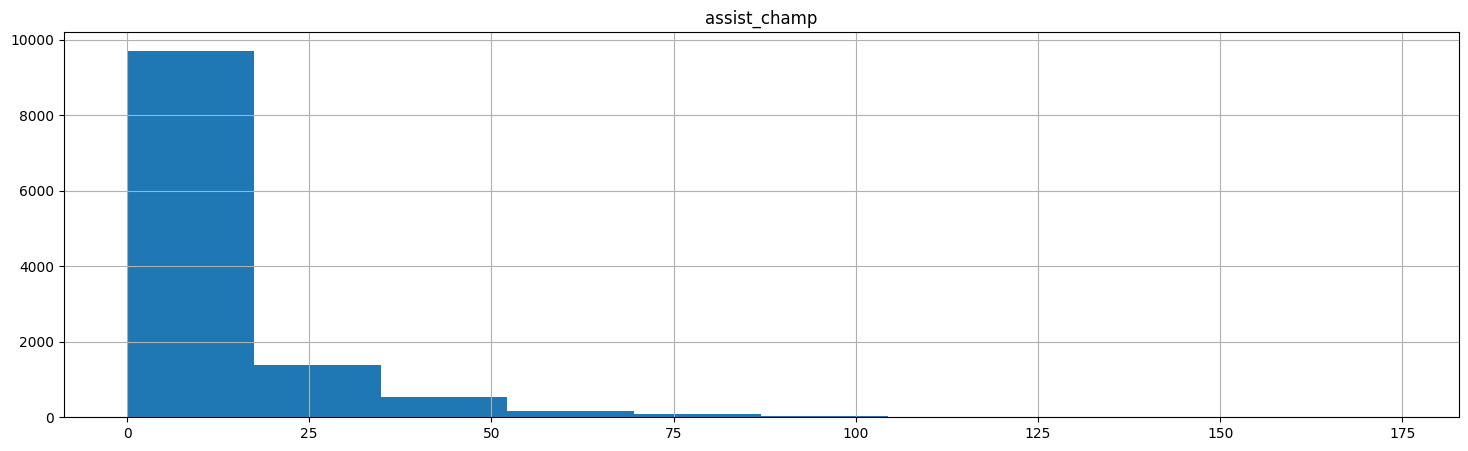

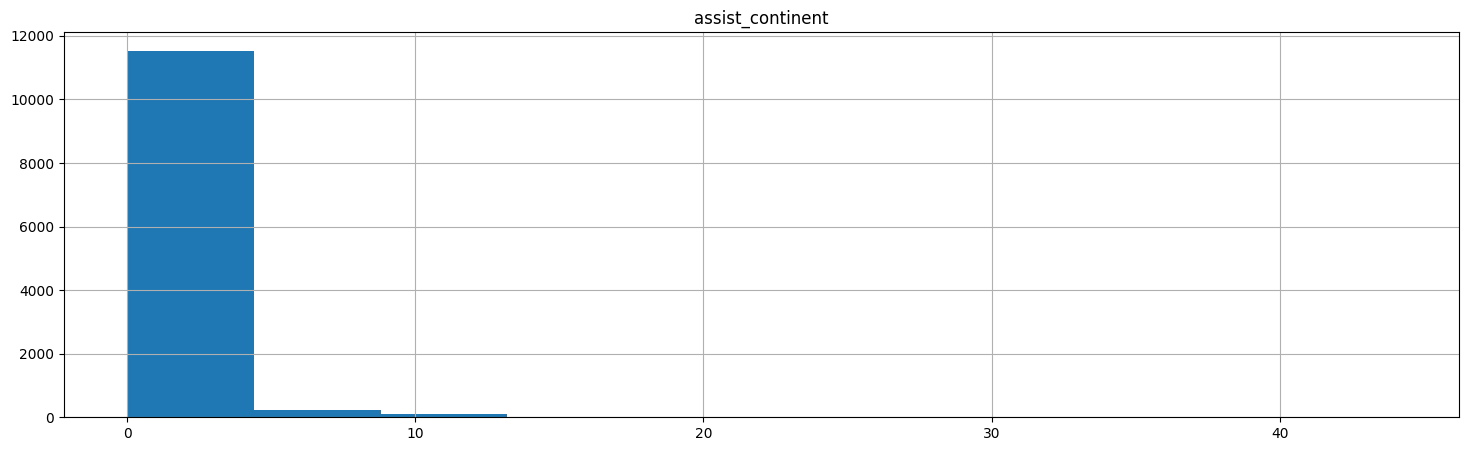

In [18]:
footballerData.hist(['assist_champ'], figsize=(18,5))
footballerData.hist(['assist_continent'], figsize=(18,5))


#**Step 11:Relationship exploration: Continuous Vs Continuous -- Scatter Chart**

In [19]:
continuous_columns = [
    "age",
    "nation",
    "league",
    "team",
    "goals_selection",
    "selections_nation",
    "price",
    "goal_champ",
    "assist_champ",
    "sub_on_champ",
    "sub_out_champ",
    "yellow_card_champ",
    "penalty_goal_champ",
    "conceded_goal_champ",
    "clean_sheet_champ",
    "goal_cup",
    "assist_cup",
    "sub_on_cup",
    "sub_out_cup",
    "yellow_card_cup",
    "penalty_goal_cup",
    "conceded_goal_cup",
    "clean_sheet_cup",
    "goal_continent",
    "assist_continent",
    "sub_on_continent",
    "sub_out_continent",
    "yellow_card_continent",
    "second_yellow_card_continent",
    "penalty_goal_continent",
    "conceded_goal_continent",
    "clean_sheet_continent",
    "price_log"
]


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current fon

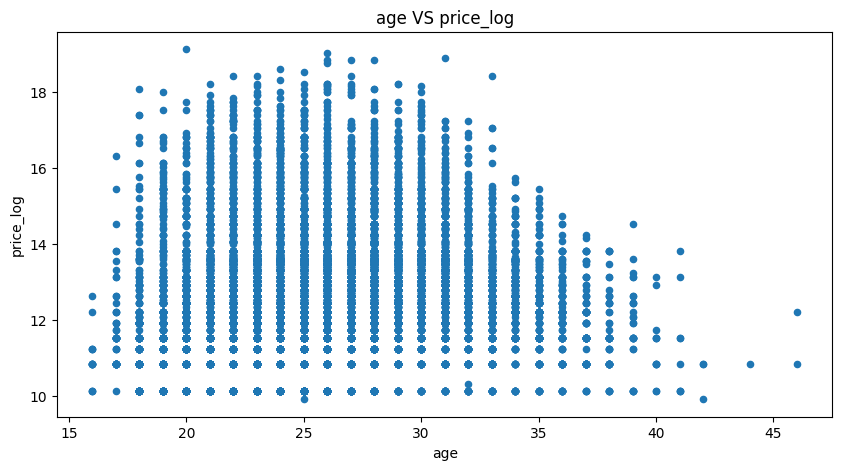

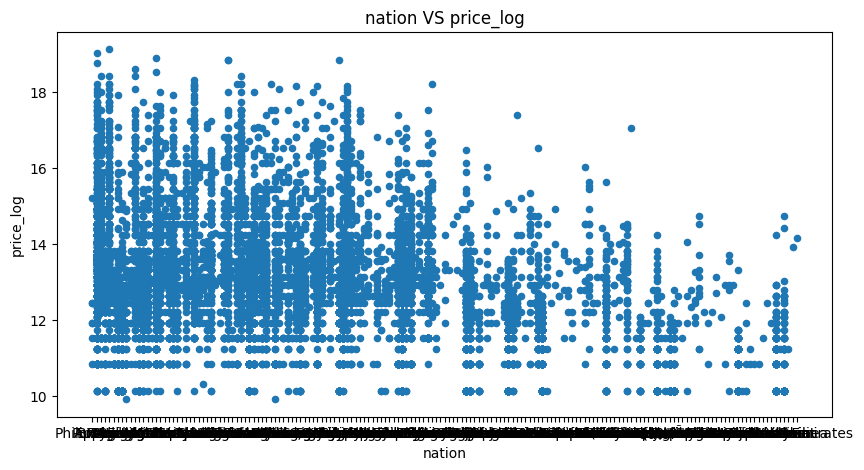

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


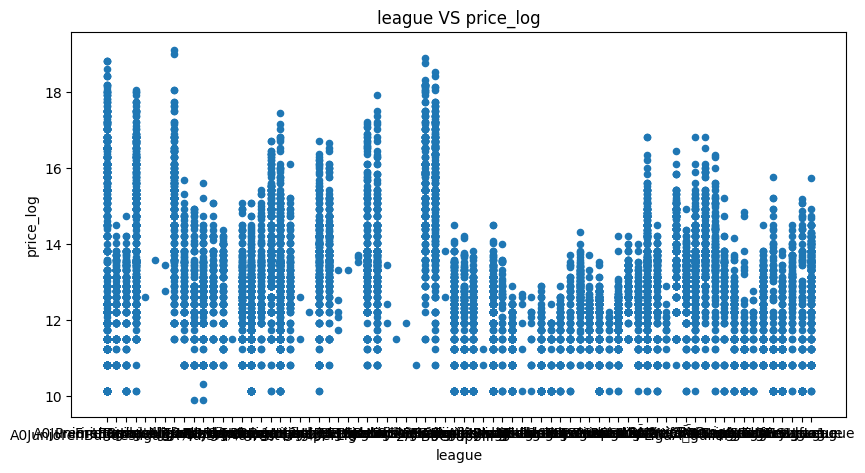

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


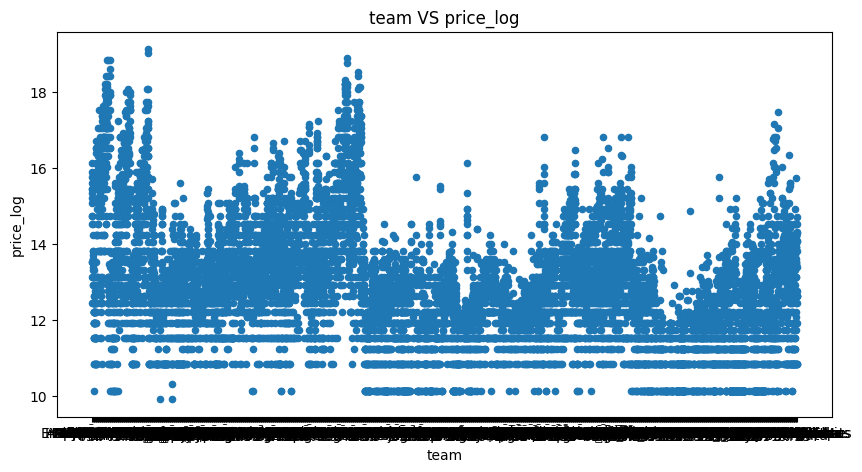

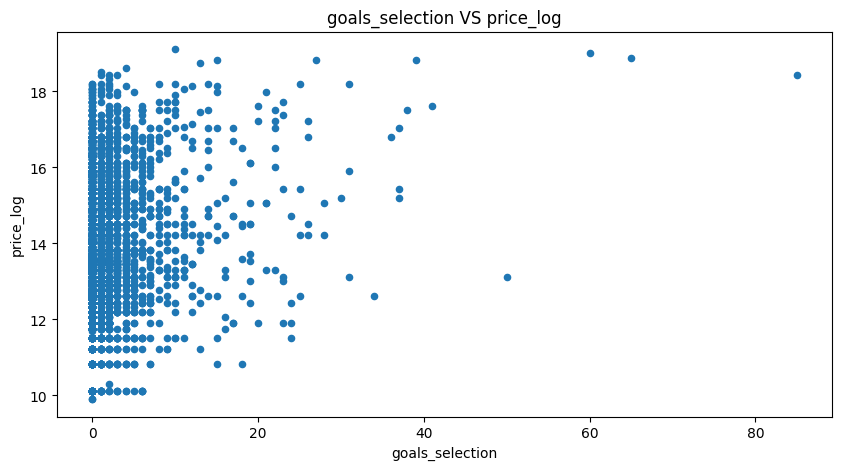

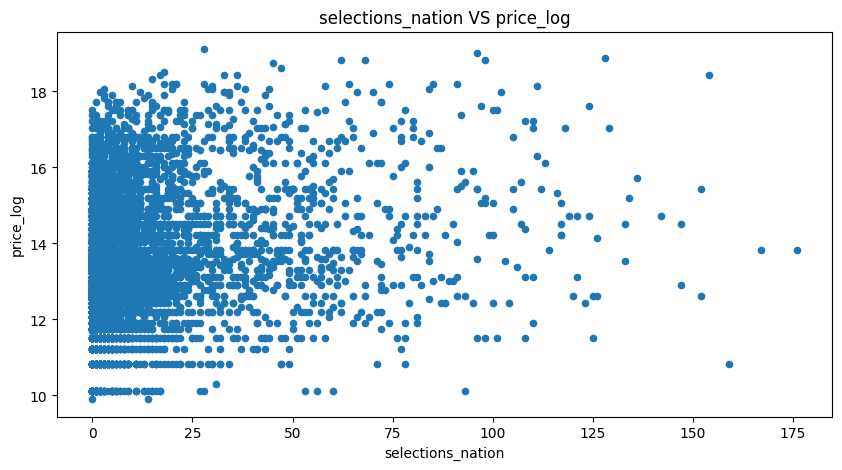

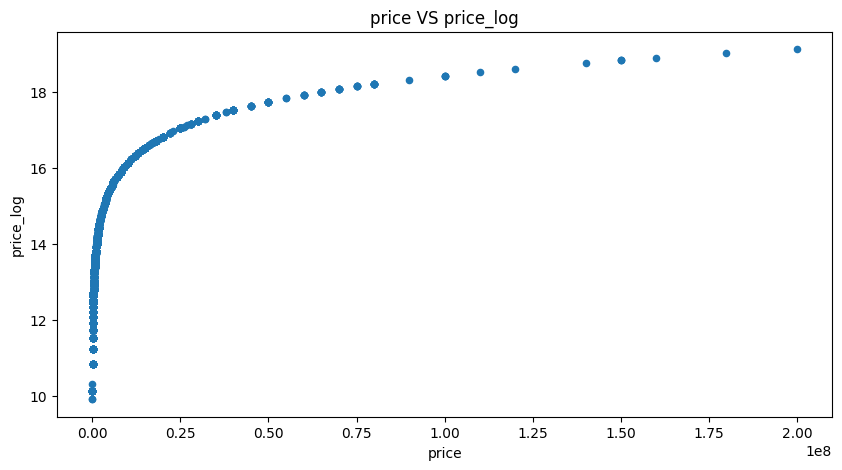

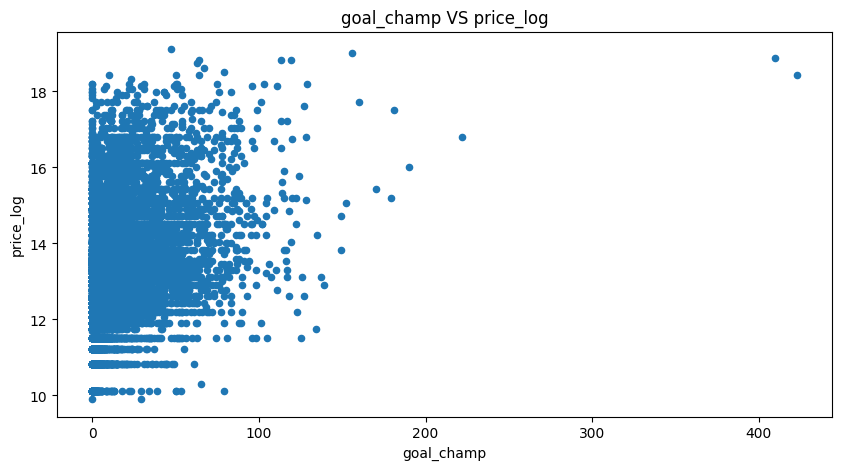

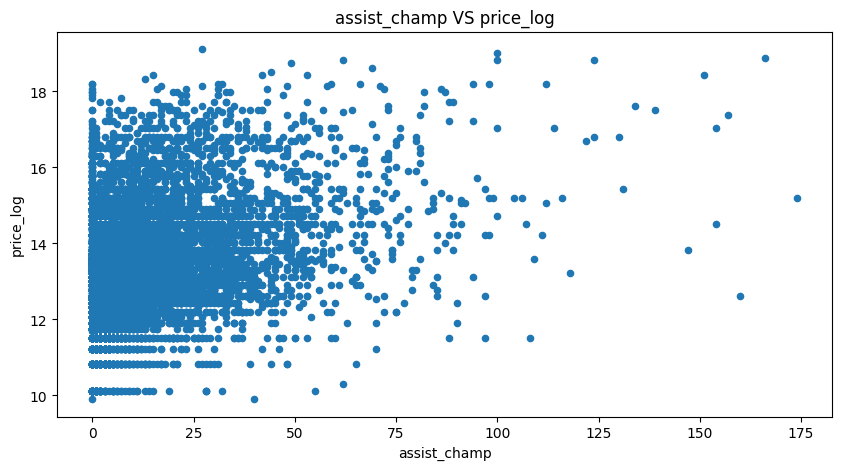

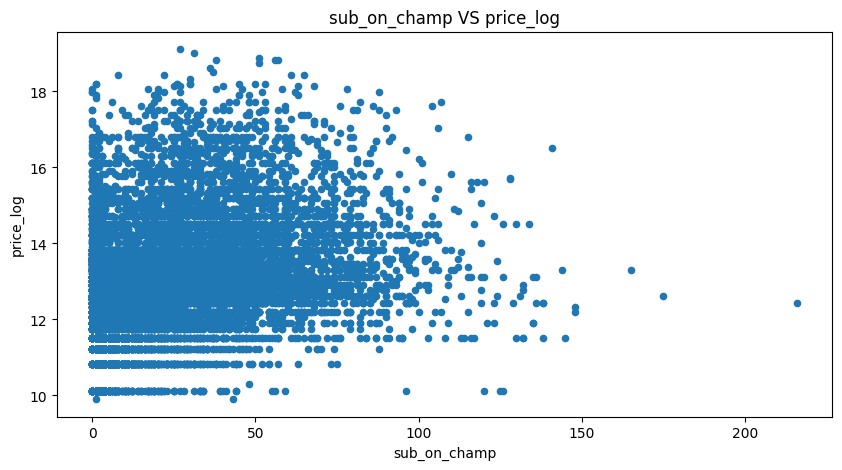

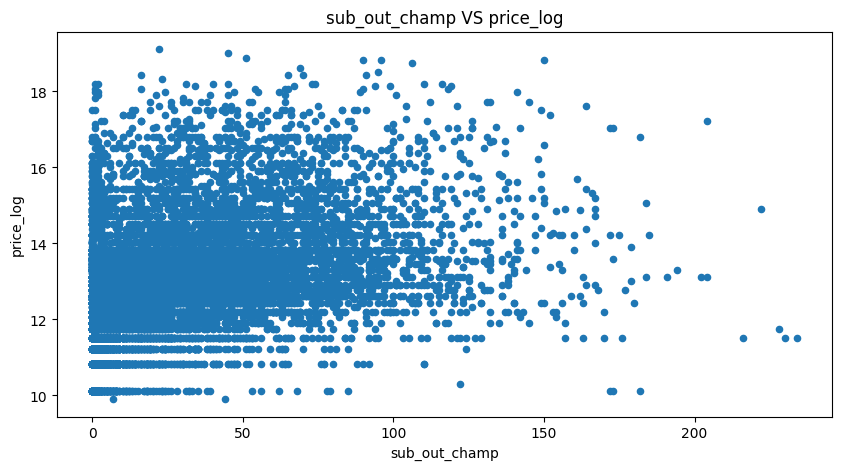

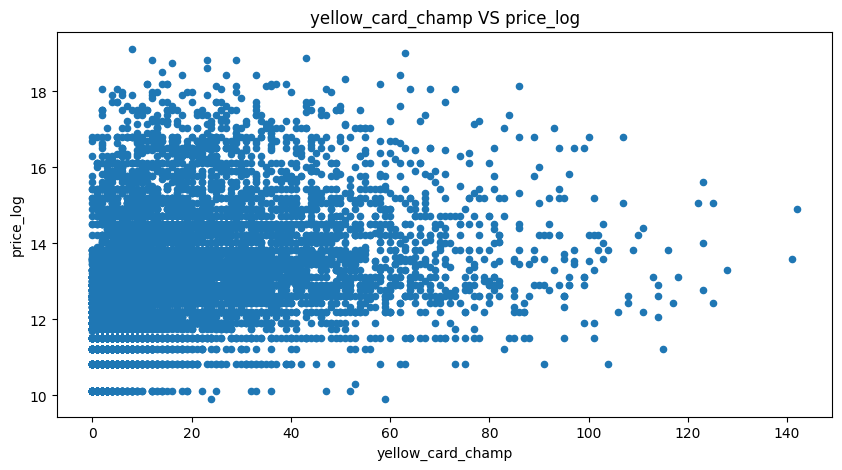

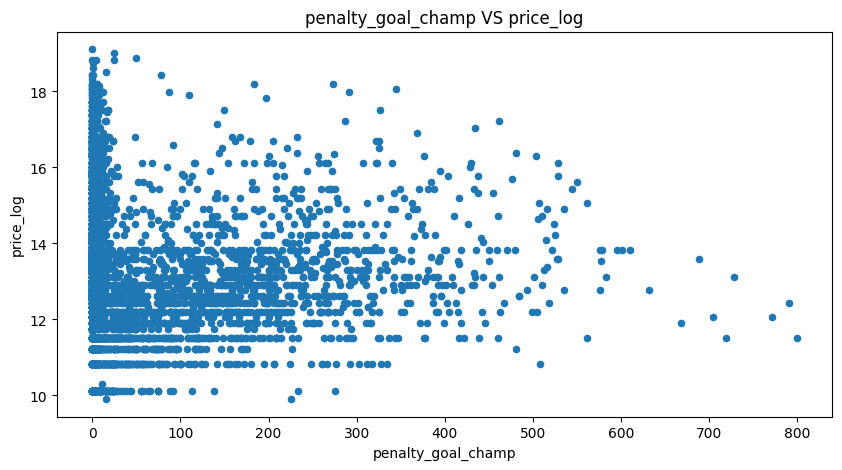

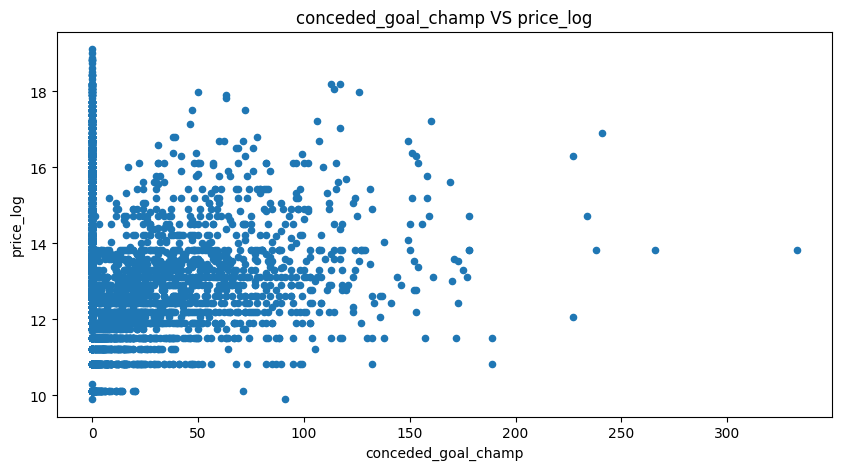

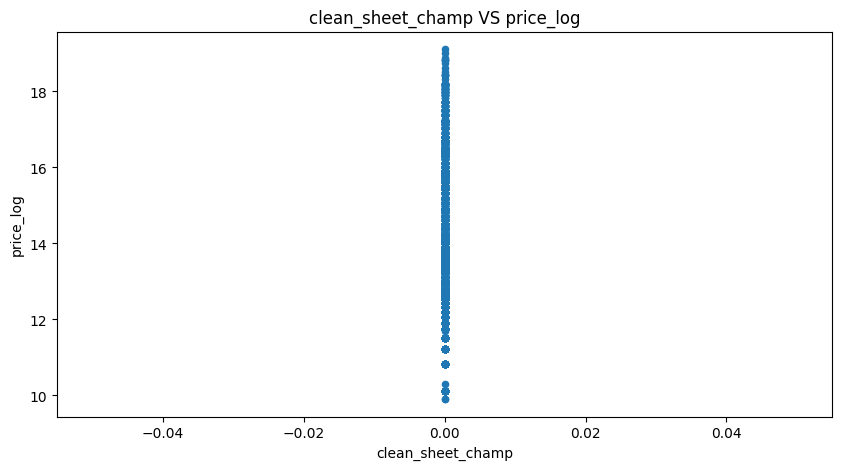

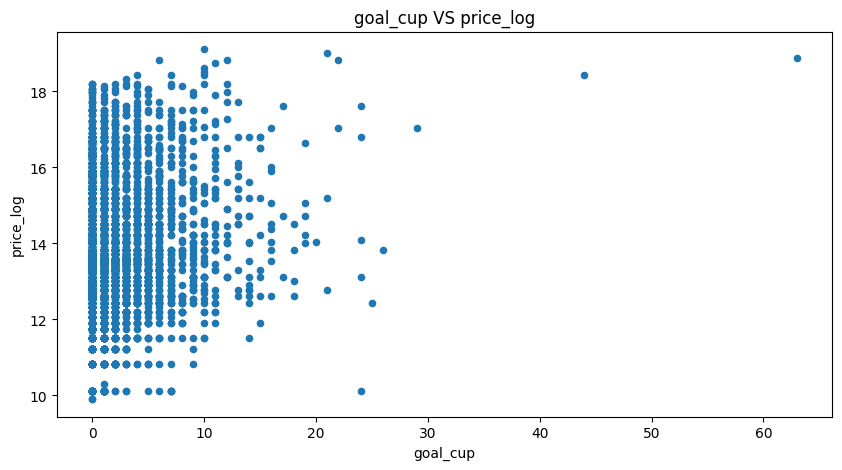

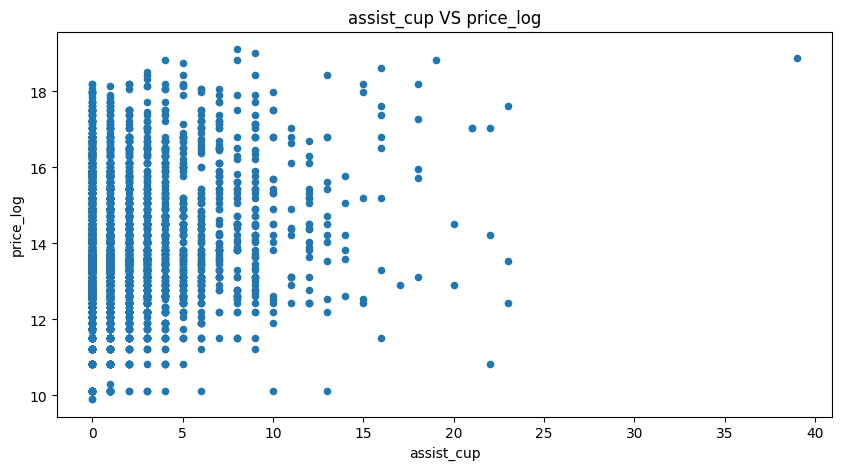

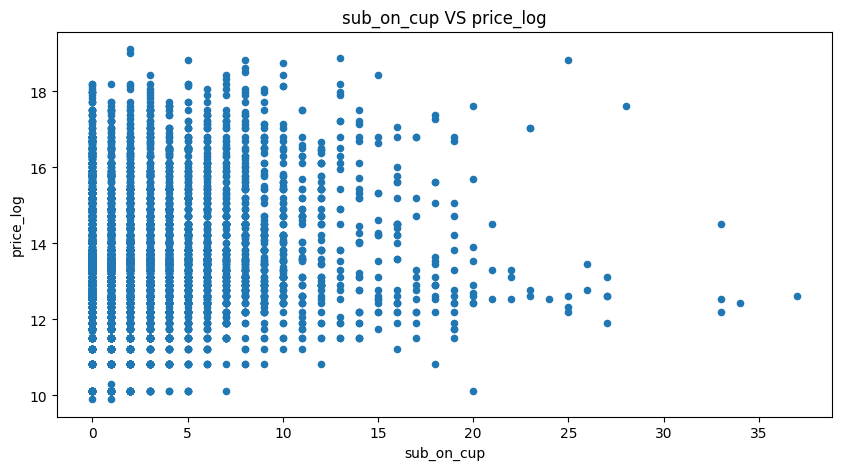

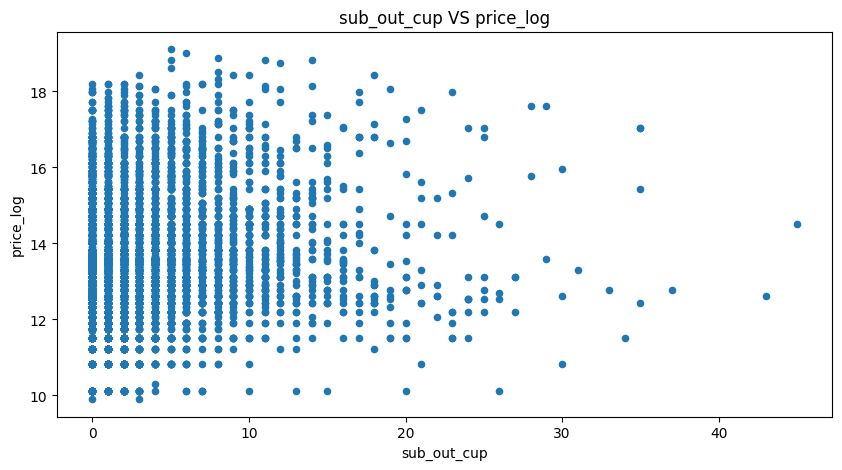

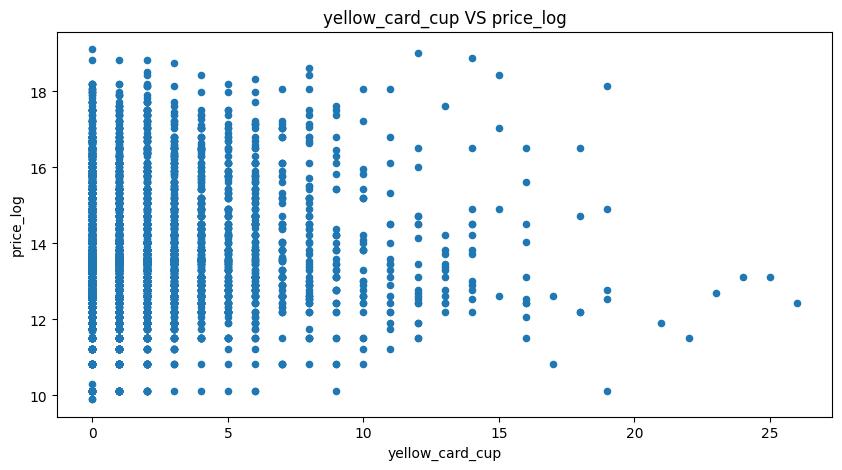

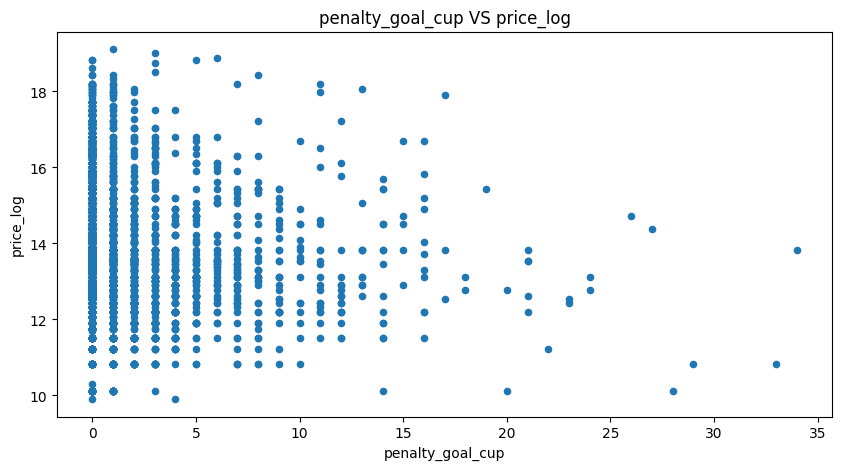

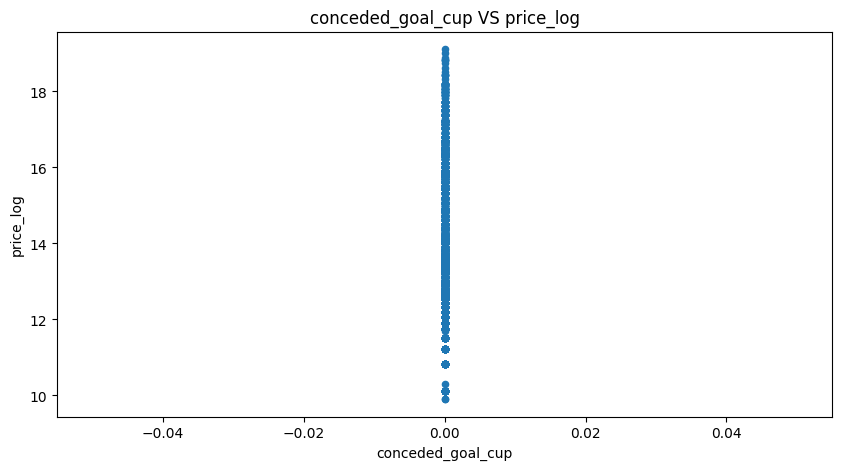

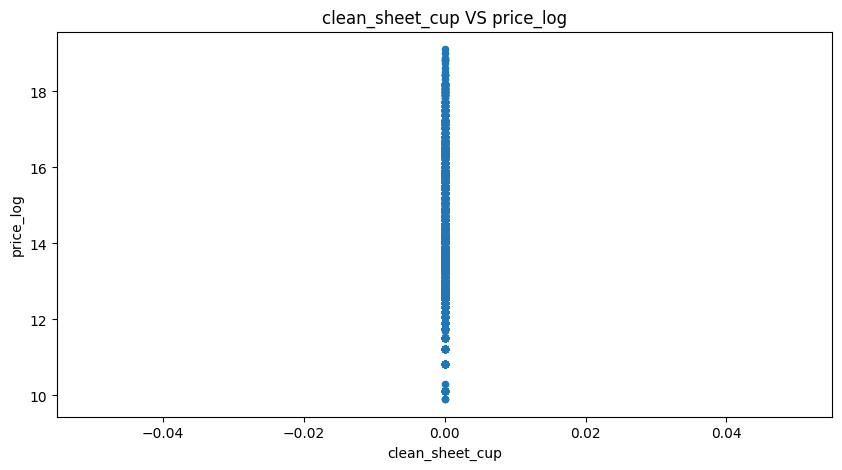

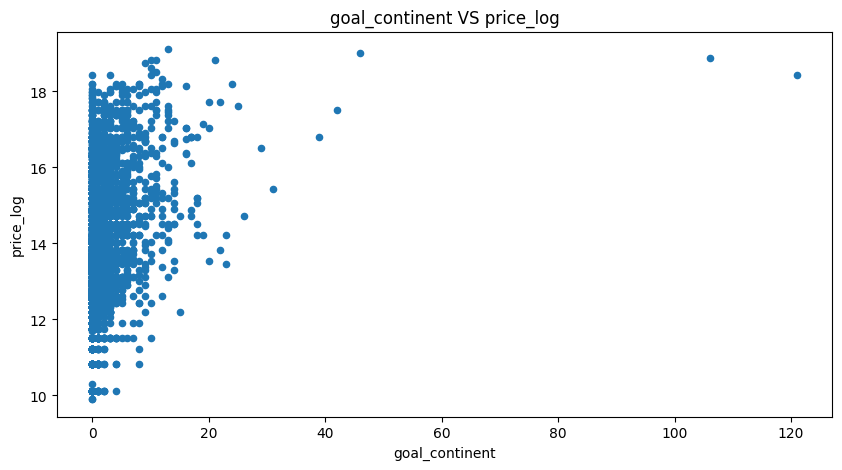

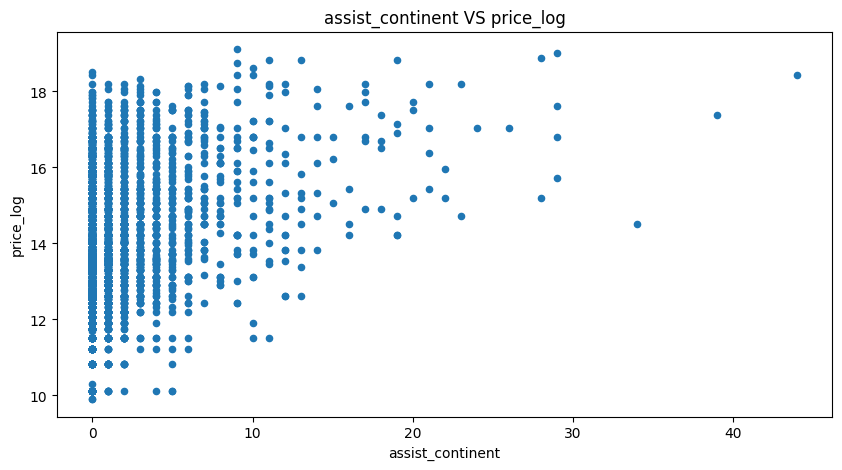

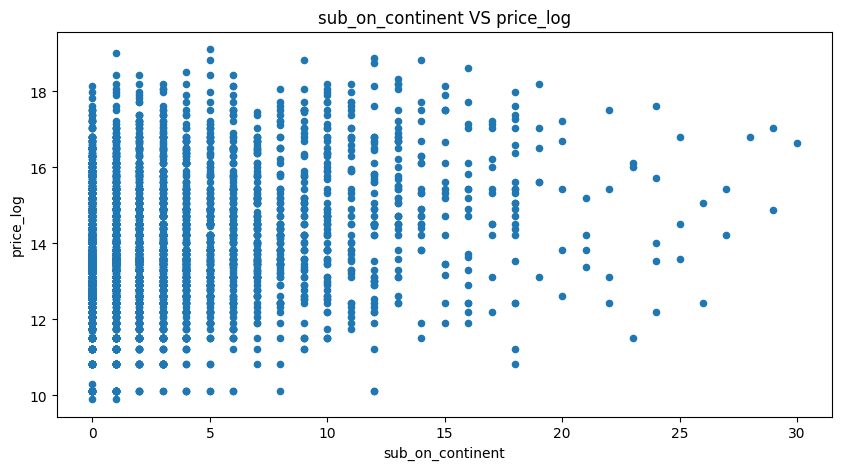

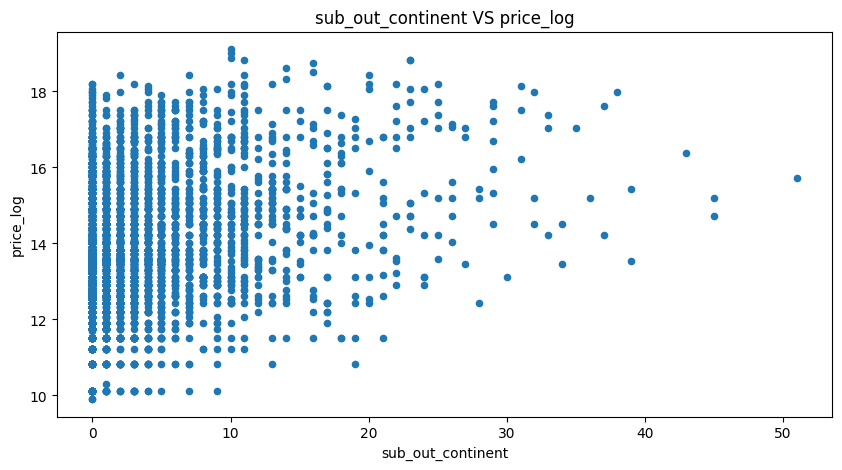

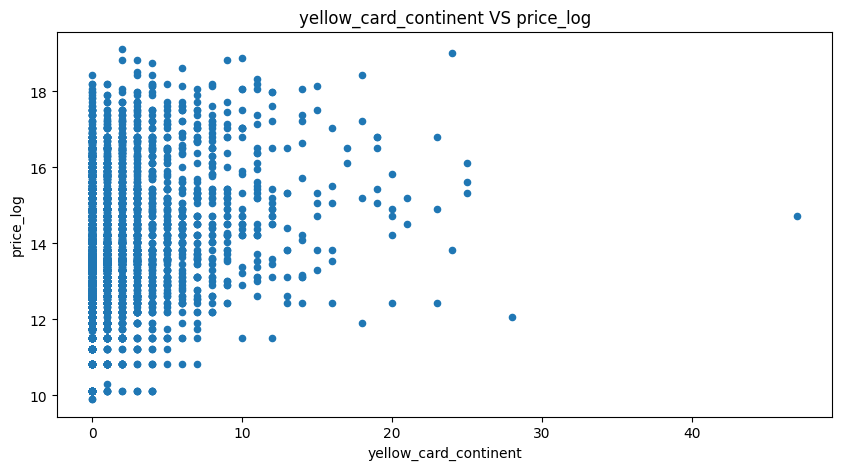

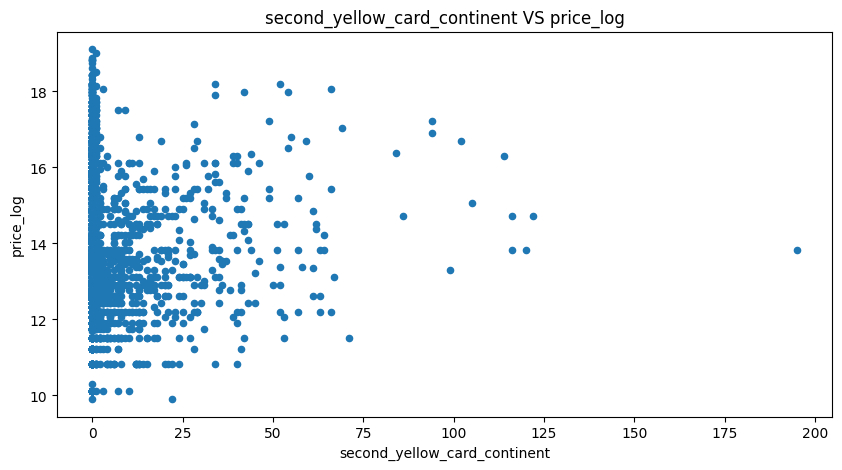

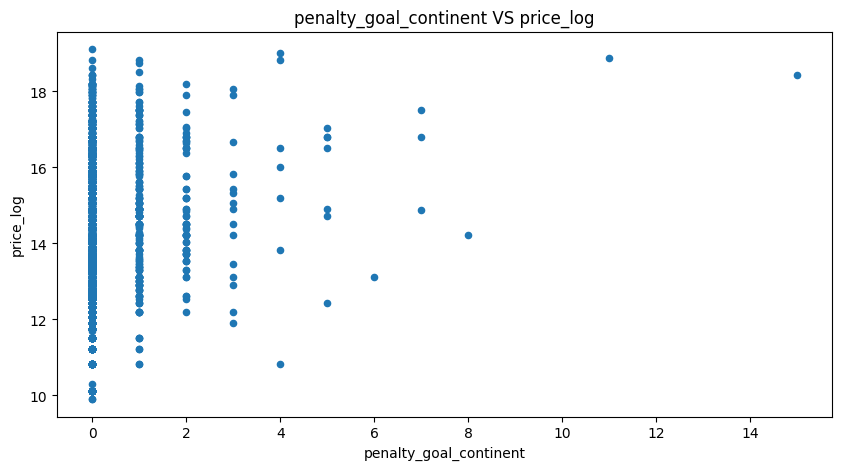

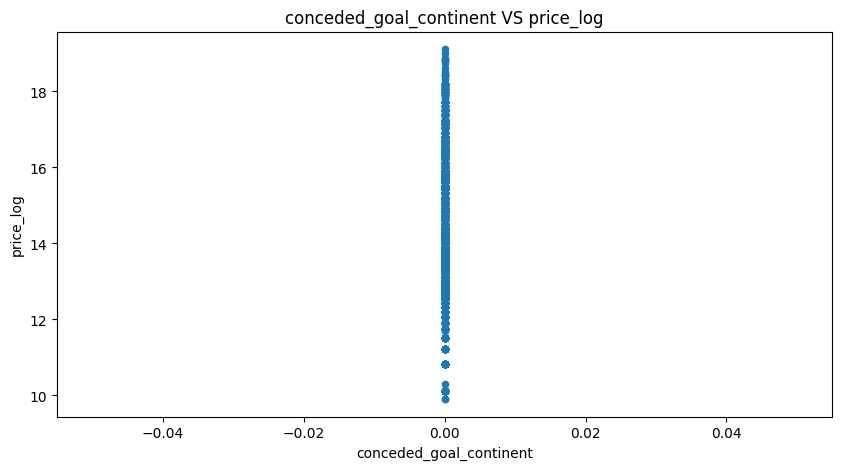

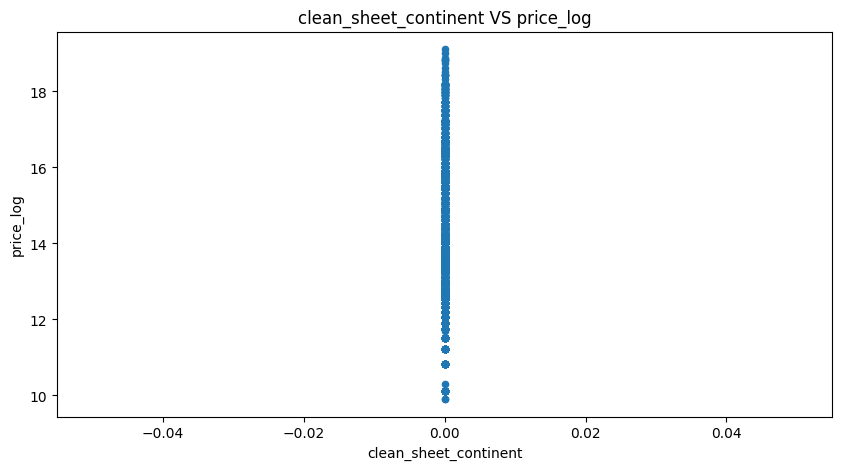

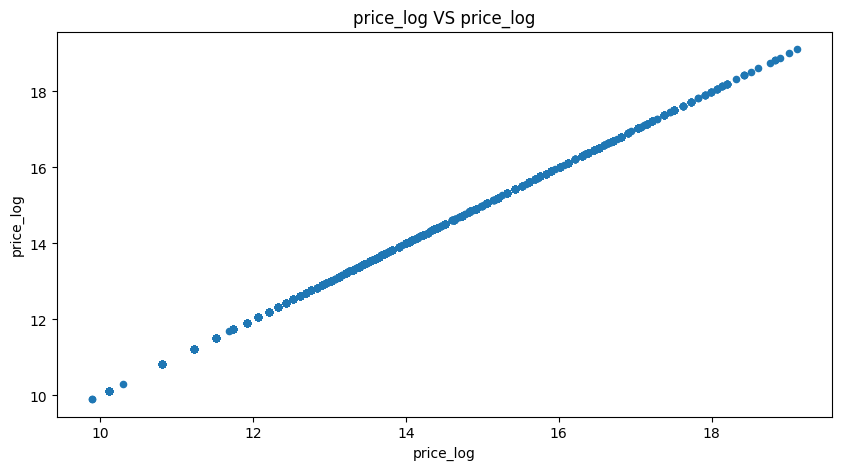

In [20]:
for predictor in continuous_columns:
  footballerData.plot.scatter(x=predictor, y='price_log', figsize=(10,5), title=predictor+" VS "+ 'price_log')

#**Step 12: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

In [21]:
continuous_columns = [
    "age",
    "selections_nation",
    "price",
    "goal_champ",
    "assist_champ",
    "sub_on_champ",
    "sub_out_champ",
    "yellow_card_champ",
    "penalty_goal_champ",
    "conceded_goal_champ",
    "goal_cup",
    "assist_cup",
    "sub_on_cup",
    "sub_out_cup",
    "yellow_card_cup",
    "penalty_goal_cup",
    "goal_continent",
    "assist_continent",
    "sub_on_continent",
    "sub_out_continent",
    "yellow_card_continent",
    "second_yellow_card_continent",
    "penalty_goal_continent",
    "price_log"
]

# Calculate correlations on the modified list of columns
CorrelationData = footballerData[continuous_columns].corr()
CorrelationData

,age,selections_nation,price,goal_champ,assist_champ,sub_on_champ,sub_out_champ,yellow_card_champ,penalty_goal_champ,conceded_goal_champ,...,yellow_card_cup,penalty_goal_cup,goal_continent,assist_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,penalty_goal_continent,price_log
age,1.000000,0.267569,-0.022560,0.294516,0.313425,0.302435,0.379878,0.494291,0.317545,0.315344,...,0.231362,0.240708,0.127413,0.156851,0.208637,0.217396,0.218429,0.183268,0.086288,0.089300
selections_nation,0.267569,1.000000,0.292631,0.380690,0.440744,0.233470,0.322720,0.325144,0.087380,0.129683,...,0.222299,0.119547,0.382125,0.446348,0.369455,0.425552,0.399191,0.201663,0.239616,0.324422
price,-0.022560,0.292631,1.000000,0.319038,0.327252,0.137344,0.188623,0.147522,0.006276,0.016931,...,0.162973,0.056883,0.464360,0.438734,0.310224,0.348330,0.296115,0.064983,0.267714,0.548198
goal_champ,0.294516,0.380690,0.319038,1.000000,0.831973,0.624998,0.767506,0.500355,-0.174534,-0.187841,...,0.266248,-0.061921,0.572702,0.511298,0.408218,0.486658,0.345075,-0.094356,0.392631,0.441269
assist_champ,0.313425,0.440744,0.327252,0.831973,1.000000,0.626258,0.791937,0.532900,-0.176768,-0.184950,...,0.305993,-0.069562,0.512795,0.605898,0.472005,0.575860,0.414548,-0.092174,0.331631,0.472477
sub_on_champ,0.302435,0.233470,0.137344,0.624998,0.626258,1.000000,0.819892,0.524206,-0.267920,-0.262941,...,0.283757,-0.148111,0.252091,0.294655,0.438382,0.400160,0.274027,-0.134593,0.125114,0.388951
sub_out_champ,0.379878,0.322720,0.188623,0.767506,0.791937,0.819892,1.000000,0.646785,-0.238857,-0.237976,...,0.329753,-0.123036,0.325039,0.391699,0.439753,0.505785,0.350041,-0.118979,0.186033,0.438481
yellow_card_champ,0.494291,0.325144,0.147522,0.500355,0.532900,0.524206,0.646785,1.000000,-0.050118,-0.046620,...,0.468400,-0.020522,0.223121,0.273369,0.304016,0.347987,0.474905,-0.008999,0.151800,0.409552
penalty_goal_champ,0.317545,0.087380,0.006276,-0.174534,-0.176768,-0.267920,-0.238857,-0.050118,1.000000,0.933788,...,-0.131814,0.529833,-0.052199,-0.061760,-0.063927,-0.102600,-0.089947,0.505475,-0.020103,0.075382
conceded_goal_champ,0.315344,0.129683,0.016931,-0.187841,-0.184950,-0.262941,-0.237976,-0.046620,0.933788,1.000000,...,-0.130672,0.555073,-0.063881,-0.069066,-0.052981,-0.105865,-0.091191,0.628960,-0.035507,0.085279


In [22]:
CorrelationData['price_log'][abs(CorrelationData['price_log']) > 0.4 ]

,price_log
price,0.548198
goal_champ,0.441269
assist_champ,0.472477
sub_out_champ,0.438481
yellow_card_champ,0.409552
sub_on_continent,0.400062
price_log,1.000000


**Final observation from step12 the final selection of data is:**

*   goal_continent
*   assist_continent
*   sub_out_champ
*   yellow_card_champ
*   sub_on_continent



#**Step 13: Relationship exploration: Categorical Vs Continuous -- Box Plots**


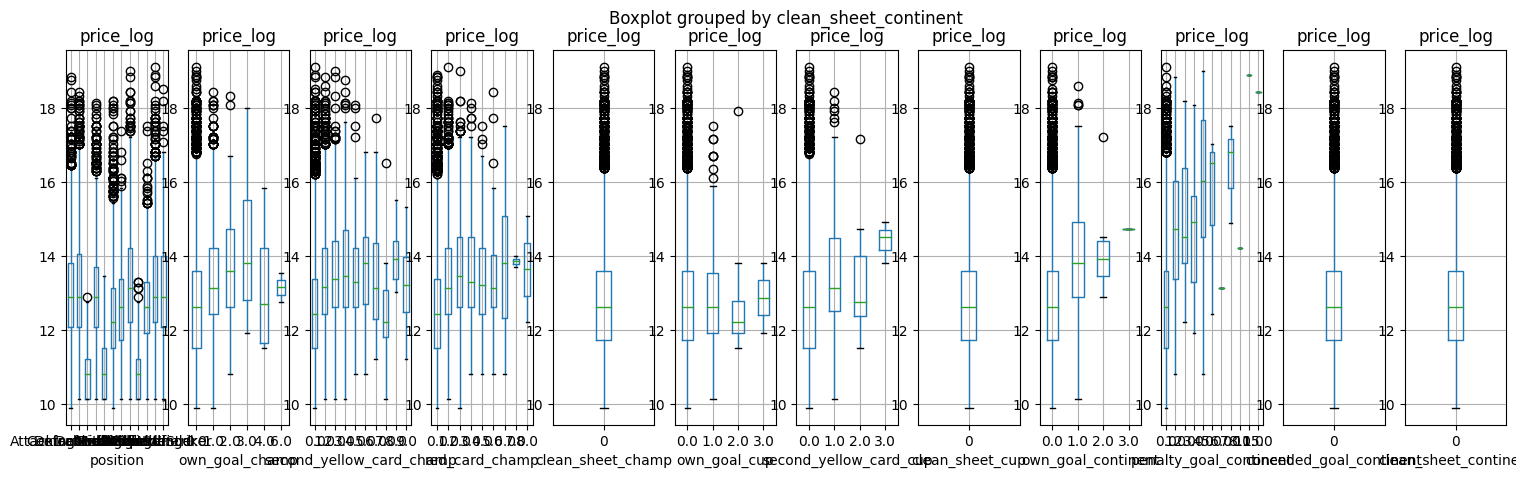

In [23]:
categorical_columns=[
    "position",
    "own_goal_champ",
    "second_yellow_card_champ",
    "red_card_champ",
    "clean_sheet_champ",
    "own_goal_cup",
    "second_yellow_card_cup",
    "clean_sheet_cup",
    "own_goal_continent",
    "penalty_goal_continent",
    "conceded_goal_continent",
    "clean_sheet_continent"
]
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(18,5))


for PredictorCol , i in zip(categorical_columns, range(len(categorical_columns))):
  footballerData.boxplot(column='price_log', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#**Step14: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

In [24]:
def FunctionAnova(inpData, TargetVariable, categorical_columns):
  from scipy.stats import f_oneway
# Creating an empty list of final selected predictors
  SelectedPredictors=[]
  print('##### ANOVA Results ##### \n')
  for predictor in categorical_columns:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    if len(CategoryGroupLists)>=2:
      AnovaResults= f_oneway(*CategoryGroupLists)
# If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
  return(SelectedPredictors)
#Calling the function to check which categorical variables are correlated with target
categorical_columns=[
    "position",
    "own_goal_champ",
    "second_yellow_card_champ",
    "red_card_champ",
    "clean_sheet_champ",
    "own_goal_cup",
    "second_yellow_card_cup",
    "clean_sheet_cup",
    "own_goal_continent",
    "penalty_goal_continent",
    "conceded_goal_continent",
    "clean_sheet_continent"
]

FunctionAnova(inpData=footballerData,TargetVariable='price_log',categorical_columns=categorical_columns)

##### ANOVA Results ##### 

position is correlated with price_log | P-Value: 0.0
own_goal_champ is correlated with price_log | P-Value: 4.4642584692113306e-43
second_yellow_card_champ is correlated with price_log | P-Value: 1.498736968377239e-187
red_card_champ is correlated with price_log | P-Value: 2.7821503411039396e-167
clean_sheet_champ is correlated with price_log | P-Value: 2.7821503411039396e-167
own_goal_cup is NOT correlated with price_log | P-Value: 0.9756667389402185
second_yellow_card_cup is correlated with price_log | P-Value: 1.8010377316659853e-16
clean_sheet_cup is correlated with price_log | P-Value: 1.8010377316659853e-16
own_goal_continent is correlated with price_log | P-Value: 2.635443412782917e-12
penalty_goal_continent is correlated with price_log | P-Value: 1.1153449696504908e-110
conceded_goal_continent is correlated with price_log | P-Value: 1.1153449696504908e-110
clean_sheet_continent is correlated with price_log | P-Value: 1.1153449696504908e-110


['position',
 'own_goal_champ',
 'second_yellow_card_champ',
 'red_card_champ',
 'clean_sheet_champ',
 'second_yellow_card_cup',
 'clean_sheet_cup',
 'own_goal_continent',
 'penalty_goal_continent',
 'conceded_goal_continent',
 'clean_sheet_continent']

**Base of on the result of the ANOVA TEST on step 14 we could see the corelated Data and the selected one:**

In [25]:
SelectedColumns=[
    'position',
    'own_goal_champ',
    'second_yellow_card_champ',
    'red_card_champ',
    'clean_sheet_champ',
    'second_yellow_card_cup',
    'clean_sheet_cup',
    'own_goal_continent',
    'penalty_goal_continent',
    'conceded_goal_continent',
    'clean_sheet_continent',
    'goal_champ',
    'assist_champ',
    'sub_out_champ',
    'yellow_card_champ',
    'sub_on_continent'
    ]
# Selecting final columns
DataForML=footballerData[SelectedColumns]
DataForML.head()

,position,own_goal_champ,second_yellow_card_champ,red_card_champ,clean_sheet_champ,second_yellow_card_cup,clean_sheet_cup,own_goal_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent,goal_champ,assist_champ,sub_out_champ,yellow_card_champ,sub_on_continent
0,Goalkeeper,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,9.0,0.0
1,RightWinger,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,6.0,0.0,7.0,0.0,1.0
2,RightWinger,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,13.0,4.0,11.0,3.0,0.0
3,SecondStriker,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,AttackingMidfield,0.0,1.0,0.0,0,0.0,0,0.0,0.0,0,0,1.0,1.0,13.0,3.0,0.0


#**Step 15: Save the file into pickle file**

In [26]:
DataForML.to_pickle('DataForML.pkl')
!ls -l

total 1524
-rw-r--r-- 1 root root 1551042 Aug 25 01:18 DataForML.pkl
drwx------ 5 root root    4096 Aug 25 01:17 drive
drwxr-xr-x 1 root root    4096 Aug 22 13:24 sample_data


**Converting the nominal variable to numeric using get_dummies**

In [27]:
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric['price_log']=footballerData['price_log']
DataForML_Numeric.head(10)

,own_goal_champ,second_yellow_card_champ,red_card_champ,clean_sheet_champ,second_yellow_card_cup,clean_sheet_cup,own_goal_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent,...,position_DefensiveMidfield,position_Forward,position_Goalkeeper,position_LeftMidfield,position_LeftWinger,position_Midfielder,position_RightMidfield,position_RightWinger,position_SecondStriker,price_log
0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,False,True,False,False,False,False,False,False,15.201805
1,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,True,False,13.592367
2,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,True,False,13.384728
3,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,True,10.819778
4,0.0,1.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,12.206073
5,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,True,False,False,False,False,False,False,False,11.918391
6,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,True,False,False,False,False,False,False,False,11.512925
7,0.0,0.0,1.0,0,0.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,12.899220
8,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,12.206073
9,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,13.122363


#**Step 18: Machine Learning Model Development:**

In [28]:
DataForML_Numeric.columns
TargetVariable='price_log'
Predictors=[
    'own_goal_champ',
    'second_yellow_card_champ',
    'red_card_champ',
    'clean_sheet_champ',
    'second_yellow_card_cup',
    'clean_sheet_cup',
    'own_goal_continent',
    'penalty_goal_continent',
    'conceded_goal_continent',
    'clean_sheet_continent',
    'goal_champ',
    'assist_champ',
    'sub_out_champ',
    'yellow_card_champ',
    'sub_on_continent'
    ]
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

#**Step 19: Standardization/Normalization of data**

In [29]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8344, 15)
(8344,)
(3576, 15)
(3576,)


#**Step 20: Multiple Linear Regression Algorithm For ML/AI model building**

In [46]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['price_log']-TestingDataResults['Predictedprice_log']))/TestingDataResults['price_log'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
# 4/16/24, 11:32 AM BostonHousPriceProject_Final.ipynb - Colab
# https://colab.research.google.com/drive/19xKg_jMIt-CwuoEizS7NTEng-kiLxyZs#scrollTo=T2Emsg2AJ7Ty&printMode=true 29/54
print( 'Mean Accuracy on test data:' , Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
LinearRegression()

LinearRegression()
R2 Value: 0.31009573231541776

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   clean_sheet_champ  second_yellow_card_cup  clean_sheet_cup  \
0                0.0                0.000000              0.0   
1                0.0                0.000000              0.0   
2                0.0                0.000000              0.0   
3                0.0                0.333333              0.0   
4                0.0                0.000000              0.0   

   own_goal_continent  penalty_goal_continent  conceded_goal_continent  \
0                 0.0                     0.0 

LinearRegression()

#**Step20: saving the model into a file**

In [31]:
FinalModel=LinearRegression()
FinalModel.fit(X,y)

LinearRegression()

In [32]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('FinalModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


#**Step21: creatign a function for testing the model for new data**
too ensure that the model doesnt just memorize the data.

In [47]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=[
    'own_goal_champ',
    'second_yellow_card_champ',
    'red_card_champ',
    'clean_sheet_champ',
    'second_yellow_card_cup',
    'clean_sheet_cup',
    'own_goal_continent',
    'penalty_goal_continent',
    'conceded_goal_continent',
    'clean_sheet_continent',
    'goal_champ',
    'assist_champ',
    'sub_out_champ',
    'yellow_card_champ',
    'sub_on_continent'
    ]

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('FinalModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

#**Step21: predicting the model with new Data**

In [36]:

import numpy as np
import pandas as pd
# Example data for prediction - aligning with your existing columns
NewSampleData = pd.DataFrame(
    data=[
        [0.0, 0.111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.078014, 0.103448, 0.256410, 0.239437, 0.0],
        [0.0, 0.000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000000, 0.005747, 0.038462, 0.014085, 0.0]
    ],
    columns=[
        'own_goal_champ', 'second_yellow_card_champ', 'red_card_champ',
        'clean_sheet_champ', 'second_yellow_card_cup', 'clean_sheet_cup',
        'own_goal_continent', 'penalty_goal_continent', 'conceded_goal_continent',
        'clean_sheet_continent', 'goal_champ', 'assist_champ', 'sub_out_champ',
        'yellow_card_champ', 'sub_on_continent'
    ]
)

print(NewSampleData)

FunctionPredictResult(InputData=NewSampleData)

PredictionResult = FunctionPredictResult(InputData=NewSampleData)
PredictionResult['Actual Price'] = np.exp(PredictionResult['Prediction'])

# Display the prediction results
print("\nPrediction Results:")
print(PredictionResult)

   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   

   clean_sheet_champ  second_yellow_card_cup  clean_sheet_cup  \
0                0.0                     0.0              0.0   
1                0.0                     0.0              0.0   

   own_goal_continent  penalty_goal_continent  conceded_goal_continent  \
0                 0.0                     0.0                      0.0   
1                 0.0                     0.0                      0.0   

   clean_sheet_continent  goal_champ  assist_champ  sub_out_champ  \
0                    0.0    0.078014      0.103448       0.256410   
1                    0.0    0.000000      0.005747       0.038462   

   yellow_card_champ  sub_on_continent  
0           0.239437               0.0  
1           0.014085               0.0  

Prediction Results:
   Prediction   Actual Price
0   12.110

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.4498324133950101

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   clean_sheet_champ  second_yellow_card_cup  clean_sheet_cup  \
0                0.0                0.000000              0.0   
1                0.0                0.000000              0.0   
2                0.0                0.000000              0.0   
3                0.0                0.333333              0.0   
4                0.0                0.000000              0.0   

   own_goal_continent  penalty_goal_continent  conceded_goal_continent  \
0    

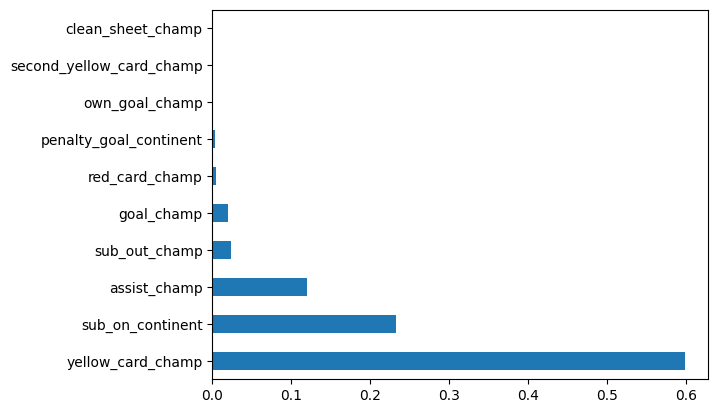

In [41]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price_log']-TestingDataResults['Predicted'+TargetVariable]))/TestingDataResults['price_log'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.4487461245847866

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   clean_sheet_champ  second_yellow_card_cup  clean_sheet_cup  \
0                0.0                0.000000              0.0   
1                0.0                0.000000              0.0   
2                0.0                0.000000              0.0   
3                0.0                0.333333              0.0   
4                0.0                0.000000              0.0   

   own_goal_continent  penalty_goal_continent  conceded_goal_

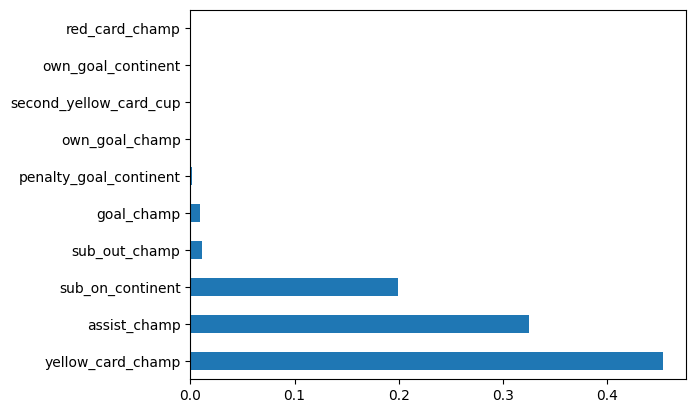

In [42]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price_log']-TestingDataResults['Predictedprice_log']))/TestingDataResults['price_log'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.427713611811264

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   clean_sheet_champ  second_yellow_card_cup  clean_sheet_cup  \
0                0.0                0.000000              0.0   
1                0.0                0.000000              0.0   
2                0.0                0.000000              0.0   
3                0.0                0.333333              0.0   
4                0.0                0.000000              0.0   

   own_goal_continent  penalty_goal_continent  conceded_goal_continent  \
0                 0.0                     0.0                      

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [90.36097958 93.38101195 94.01473165 91.52546229 92.98061434 93.27538572
 94.35102632 93.53392683 90.51152858 90.46610613]

Final Average Accuracy of the model: 92.44


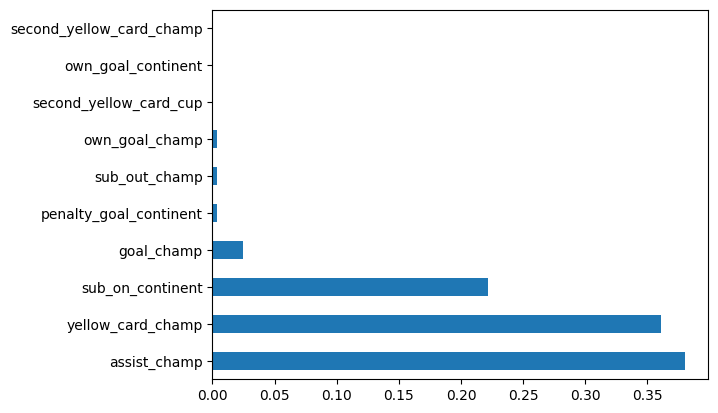

In [44]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price_log']-TestingDataResults['Predictedprice_log']))/TestingDataResults['price_log'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:35:02] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.5305730557022478

##### Model Validation and Accuracy Calculations ##########
   own_goal_champ  second_yellow_card_champ  red_card_champ  \
0             0.0                  0.111111             0.0   
1             0.0                  0.000000             0.0   
2             0.0                  0.111111             0.5   
3             0.0                  0.000000             0.0   
4             0.0                  0.000000             0.0   

   clean_sheet_champ  second_yellow_card_cup  clean_sheet_cup  \
0                0.0                0.000000              0.0   
1                0.0                0.000000              0.0   
2                0.0                0.000000              0.0   
3                0.0                0.333333              0.0   
4                0.0                0.000000              0.0   

   own_goal_continent  penalty_goal_continent  conceded_goal_continent  \
0                 0.0                     0.0                     

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:35:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:35:12] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:35:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:35:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [90.55830378 93.85313701 93.74303704 91.26696607 93.96871894 93.90312104
 94.15895414 93.75479302 91.97768531 91.29380513]

Final Average Accuracy of the model: 92.85


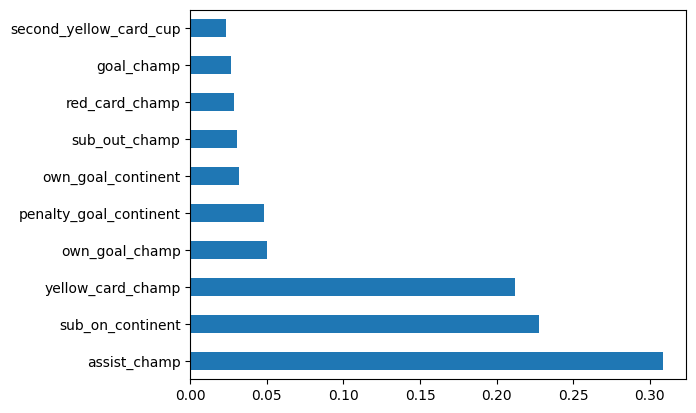

In [45]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price_log']-TestingDataResults['Predictedprice_log']))/TestingDataResults['price_log'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))